In [375]:
# Import the necessary packages.
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import shap as shap
%pip install shapiq
shap.initjs()
%pip install lightgbm
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [376]:
# Check the current working directory.
print("Current Working Directory:", os.getcwd())

# List all files in the current working directory.
print("Files in the current directory:", os.listdir())


Current Working Directory: c:\Users\kerim\OneDrive\Desktop\Project-2\Archive
Files in the current directory: ['adj_r2_model1.joblib', 'adj_r2_model2.joblib', 'Carson_cleaned.ipynb', 'Carson_cleaned_1.ipynb', 'Cleaned.csv', 'cross_val_mean.joblib', 'cross_val_mean2.joblib', 'GroupProject2.ipynb', 'Metro_invt_fs_uc_sfrcondo_sm_month.csv', 'Metro_market_temp_index_uc_sfrcondo_month (1).csv', 'Metro_market_temp_index_uc_sfrcondo_month.csv', 'Metro_mean_doz_pending_uc_sfrcondo_sm_month.csv', 'Metro_new_con_sales_count_raw_uc_sfrcondo_month.csv', 'Metro_sales_count_now_uc_sfrcondo_month.csv', 'Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv', 'Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month (1) (1).csv', 'Metro_zori_uc_sfrcondomfr_sm_month (1).csv', 'model1.joblib', 'model2.joblib', 'models.ipynb', 'models_1.ipynb', 'Project_2_test_regression_model.ipynb', 'Project_2_test_regression_model.V10.ipynb', 'Project_2_test_regression_model.V11.ipynb', 'Project_2_test_regression_model

In [377]:
# Initialize the dataframe.
df = pd.DataFrame()

# Read in the data file.
file_path = 'utah_sales_20241203_201859.csv'
if file_path in os.listdir():
	file = pd.read_csv(file_path)
	df = pd.DataFrame(file)
	df.dropna(inplace=True)
	df.head()
else:
	print(f"File '{file_path}' not found in the current directory.")

# Display the first few rows of the dataframe.
print(df.head())


C:\Users\kerim\AppData\Local\Temp\ipykernel_22908\3697229256.py:7: DtypeWarning: Columns (11,12,13,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(file_path)


                                                   id  \
8     13647-S-Vernet-Dr-W,---2039,-Riverton,-UT-84096   
11  1046-E-Blazing-Sun-Dr,---324,-Eagle-Mountain,-...   
13     3612-N-Huntsman-Path,-Unit-609,-Eden,-UT-84310   
17  4608-W-Hemsworth-Ln-S,---2067,-Riverton,-UT-84096   
24  3155-S-Hidden-Valley-Dr,-Unit-208,-Saint-Georg...   

                                     formattedAddress  \
8     13647 S Vernet Dr W, # 2039, Riverton, UT 84096   
11  1046 E Blazing Sun Dr, # 324, Eagle Mountain, ...   
13     3612 N Huntsman Path, Unit 609, Eden, UT 84310   
17  4608 W Hemsworth Ln S, # 2067, Riverton, UT 84096   
24  3155 S Hidden Valley Dr, Unit 208, Saint Georg...   

               addressLine1 addressLine2            city state  zipCode  \
8       13647 S Vernet Dr W       # 2039        Riverton    UT    84096   
11    1046 E Blazing Sun Dr        # 324  Eagle Mountain    UT    84005   
13     3612 N Huntsman Path     Unit 609            Eden    UT    84310   
17    4608 W H

In [378]:
# Display the columns of the dataframe.
df.keys()

Index(['id', 'formattedAddress', 'addressLine1', 'addressLine2', 'city',
       'state', 'zipCode', 'county', 'latitude', 'longitude', 'propertyType',
       'bedrooms', 'bathrooms', 'squareFootage', 'lotSize', 'yearBuilt',
       'status', 'price', 'listedDate', 'removedDate', 'createdDate',
       'lastSeenDate', 'daysOnMarket'],
      dtype='object')

In [379]:
# Check the data types of the columns.
df.info()

# Check the current working directory
print("Current Working Directory:", os.getcwd())

# List all files in the current working directory
print("Files in the current directory:", os.listdir())

<class 'pandas.core.frame.DataFrame'>
Index: 15115 entries, 8 to 82535
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                15115 non-null  object 
 1   formattedAddress  15115 non-null  object 
 2   addressLine1      15115 non-null  object 
 3   addressLine2      15115 non-null  object 
 4   city              15115 non-null  object 
 5   state             15115 non-null  object 
 6   zipCode           15115 non-null  int64  
 7   county            15115 non-null  object 
 8   latitude          15115 non-null  float64
 9   longitude         15115 non-null  float64
 10  propertyType      15115 non-null  object 
 11  bedrooms          15115 non-null  object 
 12  bathrooms         15115 non-null  object 
 13  squareFootage     15115 non-null  object 
 14  lotSize           15115 non-null  object 
 15  yearBuilt         15115 non-null  object 
 16  status            15115 non-null  object 
 17

In [380]:
# Display the unique property types in the dataframe.
df['propertyType'].unique()

array(['Townhouse', 'Single Family', 'Condo', 'Manufactured',
       'Multi-Family', 'Land'], dtype=object)

In [381]:
# Display the dataframe columns.
columns_to_drop = ['id', 'formattedAddress', 'addressLine1', 'addressLine2', 'city',
       'state', 'listedDate', 'removedDate', 'createdDate', 'lastSeenDate', 'status', 'county']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
dropped = df.drop(columns=columns_to_drop)

In [382]:
# Estalish the property type conditions.
my_conditions = ['Apartment','Manufactured',
       'Multi-Family','Land', 'nan', '2.0', '3.0', '5.0', '7.0',
       '6.0', '4.0', '0.0', '10.0', '1.0', '8.0', '12.0', 'Inactive']

In [383]:
# Clean the dataframe by establishing additional conditions.
dropped_cleaned = dropped[~dropped['propertyType'].isin(my_conditions)]
dropped_cleaned = dropped_cleaned[dropped_cleaned["lotSize"] != "Inactive"]
dropped_cleaned = dropped_cleaned[dropped_cleaned["squareFootage"] != "Inactive"]
dropped_cleaned = dropped_cleaned[dropped_cleaned["bedrooms"] != "Inactive"]
dropped_cleaned = dropped_cleaned[dropped_cleaned["bathrooms"] != "Inactive"]
dropped_cleaned = dropped_cleaned[dropped_cleaned["price"] != "Inactive"]
dropped_cleaned = dropped_cleaned[dropped_cleaned["yearBuilt"] != "Inactive"]
dropped_cleaned = dropped_cleaned[dropped_cleaned["lotSize"] != "Inactive"]

# Check if 'latitude' and 'longitude' columns exist before filtering
if 'latitude' in dropped_cleaned.columns:
	dropped_cleaned = dropped_cleaned[dropped_cleaned["latitude"] != "Inactive"]
if 'longitude' in dropped_cleaned.columns:
	dropped_cleaned = dropped_cleaned[dropped_cleaned["longitude"] != "Inactive"]

dropped_cleaned = dropped_cleaned[dropped_cleaned["propertyType"] != "Inactive"]

# Ensure 'lotSize' column is of string type before using .str accessor
dropped_cleaned["lotSize"] = dropped_cleaned["lotSize"].astype(str)
dropped_cleaned = dropped_cleaned[dropped_cleaned["lotSize"].str.len().between(0, 8)]

dropped_cleaned = dropped_cleaned.dropna()
dropped_cleaned

,zipCode,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,price,daysOnMarket
8,84096,40.503300,-112.001572,Townhouse,5.0,3.0,3622.0,1307.0,2024.0,588900,81.0
11,84005,40.322655,-112.023788,Single Family,3.0,2.5,4054.0,9148.0,2024.0,632525,79.0
13,84310,41.324364,-111.823717,Condo,2.0,2.0,1100.0,3485.0,2002.0,505000,73.0
17,84096,40.504021,-112.000793,Townhouse,3.0,2.5,2280.0,1307.0,2024.0,501900,68.0
24,84790,37.053494,-113.569428,Townhouse,3.0,2.5,1430.0,871.0,2006.0,309900,56.0
...,...,...,...,...,...,...,...,...,...,...,...
82505,84790,37.049554,-113.554598,Townhouse,3.0,3.0,1465.0,871.0,2015.0,335000,515.0
82508,84341,41.790873,-111.787867,Single Family,8.0,5.0,7036.0,26136.0,2005.0,1165000,126.0
82515,84762,37.490615,-112.778916,Single Family,1.0,2.0,300.0,115870.0,2014.0,110000,255.0
82522,84340,41.394288,-112.035649,Single Family,4.0,3.0,3326.0,11761.0,2022.0,648000,45.0


In [384]:
# Display the unique property types in the cleaned dataframe.
dropped_cleaned.keys()

Index(['zipCode', 'latitude', 'longitude', 'propertyType', 'bedrooms',
       'bathrooms', 'squareFootage', 'lotSize', 'yearBuilt', 'price',
       'daysOnMarket'],
      dtype='object')

In [385]:
# Convert fields to the proper data type and remove outliers meeting the following conditions:
# Bedrooms greater than 10
# Bathrooms greater than 8.5
# Square footage greater than 20K
# Year built greater than 2024
# Year built less than 1920
# Bedrooms less than 1
# Price under 15K
# Zip code greater than or equal to 99999

dropped_cleaned[['zipCode','bedrooms', 'bathrooms', 'squareFootage',
       'lotSize', 'yearBuilt', 'price', 'daysOnMarket']] = dropped_cleaned[['zipCode','bedrooms', 'bathrooms', 'squareFootage',
       'lotSize', 'yearBuilt', 'price', 'daysOnMarket']].apply(pd.to_numeric, errors="coerce")
dropped_cleaned = dropped_cleaned[dropped_cleaned['zipCode'] < 99998]
dropped_cleaned = dropped_cleaned[dropped_cleaned['bathrooms'] < 8.5]
dropped_cleaned = dropped_cleaned[dropped_cleaned['bedrooms'] < 10]
dropped_cleaned = dropped_cleaned[dropped_cleaned['squareFootage'] < 20000]
dropped_cleaned = dropped_cleaned[dropped_cleaned['yearBuilt'] > 1920]
dropped_cleaned = dropped_cleaned[dropped_cleaned['yearBuilt'] < 2025]
dropped_cleaned = dropped_cleaned[dropped_cleaned['bedrooms'] > 0]

In [386]:
# Display the cleaned dataframe.
le = LabelEncoder()
dropped_cleaned['propertyType'] = le.fit_transform(dropped_cleaned['propertyType'])
dropped_cleaned

,zipCode,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,price,daysOnMarket
8,84096,40.503300,-112.001572,2,5.0,3.0,3622.0,1307.0,2024.0,588900,81.0
11,84005,40.322655,-112.023788,1,3.0,2.5,4054.0,9148.0,2024.0,632525,79.0
13,84310,41.324364,-111.823717,0,2.0,2.0,1100.0,3485.0,2002.0,505000,73.0
17,84096,40.504021,-112.000793,2,3.0,2.5,2280.0,1307.0,2024.0,501900,68.0
24,84790,37.053494,-113.569428,2,3.0,2.5,1430.0,871.0,2006.0,309900,56.0
...,...,...,...,...,...,...,...,...,...,...,...
82505,84790,37.049554,-113.554598,2,3.0,3.0,1465.0,871.0,2015.0,335000,515.0
82508,84341,41.790873,-111.787867,1,8.0,5.0,7036.0,26136.0,2005.0,1165000,126.0
82515,84762,37.490615,-112.778916,1,1.0,2.0,300.0,115870.0,2014.0,110000,255.0
82522,84340,41.394288,-112.035649,1,4.0,3.0,3326.0,11761.0,2022.0,648000,45.0


In [387]:
# Display the details of the cleaned dataframe.
dropped_cleaned.dtypes

zipCode            int64
latitude         float64
longitude        float64
propertyType       int32
bedrooms         float64
bathrooms        float64
squareFootage    float64
lotSize          float64
yearBuilt        float64
price              int64
daysOnMarket     float64
dtype: object

In [388]:
# Display the scores for dropped_clean.
for x in dropped_cleaned:
    score = dropped_cleaned[x].max()
    print(score)

84790
41.979897
-109.136174
2
9.0
8.0
12297.0
977922.0
2024.0
22900000
1092.0


In [389]:
# Display the cleaned dataframe.
df = dropped_cleaned
for col in df.columns:
    try:
        pd.to_numeric(df[col])
    except ValueError:
        print(f"Non-numeric data found in column: {col}")
df

,zipCode,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,price,daysOnMarket
8,84096,40.503300,-112.001572,2,5.0,3.0,3622.0,1307.0,2024.0,588900,81.0
11,84005,40.322655,-112.023788,1,3.0,2.5,4054.0,9148.0,2024.0,632525,79.0
13,84310,41.324364,-111.823717,0,2.0,2.0,1100.0,3485.0,2002.0,505000,73.0
17,84096,40.504021,-112.000793,2,3.0,2.5,2280.0,1307.0,2024.0,501900,68.0
24,84790,37.053494,-113.569428,2,3.0,2.5,1430.0,871.0,2006.0,309900,56.0
...,...,...,...,...,...,...,...,...,...,...,...
82505,84790,37.049554,-113.554598,2,3.0,3.0,1465.0,871.0,2015.0,335000,515.0
82508,84341,41.790873,-111.787867,1,8.0,5.0,7036.0,26136.0,2005.0,1165000,126.0
82515,84762,37.490615,-112.778916,1,1.0,2.0,300.0,115870.0,2014.0,110000,255.0
82522,84340,41.394288,-112.035649,1,4.0,3.0,3326.0,11761.0,2022.0,648000,45.0


In [390]:
# Convert all of the string data to numbers with one hot encoder or get dummies.
# df = pd.get_dummies(df, columns=['city', 'state', 'zipCode', 'county', 'latitude', 'longitude', 'propertyType',
# 'bedrooms', 'bathrooms', 'squareFootage', 'lotSize', 'yearBuilt','status', 'listedDate', 'removedDate', 'createdDate', 'daysOnMarket'])

In [391]:
# Display the dataframe column headers.
df.head()

,zipCode,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,price,daysOnMarket
8,84096,40.503300,-112.001572,2,5.0,3.0,3622.0,1307.0,2024.0,588900,81.0
11,84005,40.322655,-112.023788,1,3.0,2.5,4054.0,9148.0,2024.0,632525,79.0
13,84310,41.324364,-111.823717,0,2.0,2.0,1100.0,3485.0,2002.0,505000,73.0
17,84096,40.504021,-112.000793,2,3.0,2.5,2280.0,1307.0,2024.0,501900,68.0
24,84790,37.053494,-113.569428,2,3.0,2.5,1430.0,871.0,2006.0,309900,56.0


In [392]:
# Split the data into training and testing sets
X = df.drop('price', axis=1)
y = df['price'] / 1e6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [393]:
# Print x_train column headers.
X_train.head()

,zipCode,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,daysOnMarket
2325,84720,37.680984,-113.145535,1,5.0,2.5,2300.0,13068.0,2023.0,92.0
32736,84790,37.011917,-113.598160,2,3.0,2.5,1611.0,1742.0,2023.0,397.0
81832,84414,41.311148,-111.962272,1,3.0,1.0,2018.0,9148.0,1960.0,29.0
26017,84770,37.126242,-113.610708,1,3.0,2.0,1624.0,1742.0,1988.0,374.0
428,84790,37.049639,-113.554287,2,3.0,2.5,1475.0,871.0,2015.0,14.0


In [394]:
# Print the first 5 rows of the y_train data.
y_train.head()

2325     0.46900
32736    0.44689
81832    0.41950
26017    0.37990
428      0.31000
Name: price, dtype: float64

In [395]:
# Make an X variable with all columns except price
X_full = df.drop(columns = ['price'])
X_full.columns

Index(['zipCode', 'latitude', 'longitude', 'propertyType', 'bedrooms',
       'bathrooms', 'squareFootage', 'lotSize', 'yearBuilt', 'daysOnMarket'],
      dtype='object')

In [396]:
X_full.head()

,zipCode,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,daysOnMarket
8,84096,40.503300,-112.001572,2,5.0,3.0,3622.0,1307.0,2024.0,81.0
11,84005,40.322655,-112.023788,1,3.0,2.5,4054.0,9148.0,2024.0,79.0
13,84310,41.324364,-111.823717,0,2.0,2.0,1100.0,3485.0,2002.0,73.0
17,84096,40.504021,-112.000793,2,3.0,2.5,2280.0,1307.0,2024.0,68.0
24,84790,37.053494,-113.569428,2,3.0,2.5,1430.0,871.0,2006.0,56.0


In [397]:
# Make a y variable with the price column
y = df['price']/ 1e6

In [398]:
# # Use get_dummies to make categorical variables into numerical.
# X = pd.get_dummies(X_full)

In [399]:
# Select the dataframe features.
select_features = ['latitude', 'longitude', 'squareFootage', 'lotSize', 'bathrooms', 'bedrooms', 'yearBuilt', 'daysOnMarket', 'propertyType']

In [400]:
# Display the columns for the select_features.
select_features

['latitude',
 'longitude',
 'squareFootage',
 'lotSize',
 'bathrooms',
 'bedrooms',
 'yearBuilt',
 'daysOnMarket',
 'propertyType']

In [401]:
# Create another variable X_sel with only the columns in the "select_features" list.
# Ensure the columns in select_features exist in the dataframe
select_features = [col for col in select_features if col in df.columns]
X_sel = df[select_features]
X_sel

,latitude,longitude,squareFootage,lotSize,bathrooms,bedrooms,yearBuilt,daysOnMarket,propertyType
8,40.503300,-112.001572,3622.0,1307.0,3.0,5.0,2024.0,81.0,2
11,40.322655,-112.023788,4054.0,9148.0,2.5,3.0,2024.0,79.0,1
13,41.324364,-111.823717,1100.0,3485.0,2.0,2.0,2002.0,73.0,0
17,40.504021,-112.000793,2280.0,1307.0,2.5,3.0,2024.0,68.0,2
24,37.053494,-113.569428,1430.0,871.0,2.5,3.0,2006.0,56.0,2
...,...,...,...,...,...,...,...,...,...
82505,37.049554,-113.554598,1465.0,871.0,3.0,3.0,2015.0,515.0,2
82508,41.790873,-111.787867,7036.0,26136.0,5.0,8.0,2005.0,126.0,1
82515,37.490615,-112.778916,300.0,115870.0,2.0,1.0,2014.0,255.0,1
82522,41.394288,-112.035649,3326.0,11761.0,3.0,4.0,2022.0,45.0,1


In [402]:
# Set the target variable y.
y = df['price'] / 1e6
y

8        0.588900
11       0.632525
13       0.505000
17       0.501900
24       0.309900
           ...   
82505    0.335000
82508    1.165000
82515    0.110000
82522    0.648000
82535    0.255000
Name: price, Length: 12347, dtype: float64

In [403]:
# Now split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(10494, 10) (1853, 10) (10494,) (1853,)


## Train the models

In [404]:
# Print the x-train model
print(X_train)

       zipCode   latitude   longitude  propertyType  bedrooms  bathrooms  \
2325     84720  37.680984 -113.145535             1       5.0        2.5   
32736    84790  37.011917 -113.598160             2       3.0        2.5   
81832    84414  41.311148 -111.962272             1       3.0        1.0   
26017    84770  37.126242 -113.610708             1       3.0        2.0   
428      84790  37.049639 -113.554287             2       3.0        2.5   
...        ...        ...         ...           ...       ...        ...   
80060    84098  40.728772 -111.485843             2       3.0        1.5   
34785    84770  37.115711 -113.606483             1       4.0        3.0   
36467    84341  41.780189 -111.828759             1       4.0        3.0   
6140     84664  40.097473 -111.590271             1       4.0        2.5   
49214    84057  40.315266 -111.723188             0       2.0        1.0   

       squareFootage  lotSize  yearBuilt  daysOnMarket  
2325          2300.0  13068.0 

In [405]:
# Print the y_train model
print(y_train)

2325     0.469000
32736    0.446890
81832    0.419500
26017    0.379900
428      0.310000
           ...   
80060    0.560996
34785    0.499900
36467    0.445000
6140     0.799900
49214    0.259000
Name: price, Length: 10494, dtype: float64


In [406]:
# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Display the scaled data.
X_train_scaled
X_test_scaled

# Create a LinearRegression model and fit it to the scaled training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions using the X_test_scaled data
predictions = model.predict(X_test_scaled)

# Display the predictions.
predictions

# Display the actual prices.
y_test

# Display the model score.
model.score(X_test_scaled, y_test)

# Display the model coefficients.
model.coef_

# Display the model intercept.
model.intercept_

# Add a constant to the model (intercept)
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_scaled_const).fit()

# Display the model summary
print(model_sm.summary())


X_train shape: (10494, 10)
y_train shape: (10494,)
X_test shape: (1853, 10)
y_test shape: (1853,)
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     613.6
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:36:23   Log-Likelihood:                -10650.
No. Observations:               10494   AIC:                         2.132e+04
Df Residuals:                   10483   BIC:                         2.140e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [407]:
# Create the models.
model1 = LinearRegression()
model2 = xgb.XGBRegressor()
model3 = Lasso()
model4 = lgb.LGBMRegressor()

# Fit the first model to the full training data.
model1.fit(X_train, y_train)

# Fit the second model to the select training data.
model2.fit(X_train, y_train)

# Fit the third model to the select training data.
model3.fit(X_train, y_train)

# Fit the fourth model to the select training data.
model4.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Make predictions on the full training data.
y_pred1 = model1.predict(X_train)
y_pred2 = model2.predict(X_train)
y_pred3 = model3.predict(X_train)
y_pred4 = model4.predict(X_train)

# Make predictions on the select training data.
y_pred1_sel = model1.predict(X_train)
y_pred2_sel = model2.predict(X_train)
y_pred3_sel = model3.predict(X_train)
y_pred4_sel = model4.predict(X_train)

# Print the R2 scores for the full training data.
print("Linear Regression R2 Score (Full-Training):", r2_score(y_train, y_pred1))
print("XGBoost R2 Score (Full-Training):", r2_score(y_train, y_pred2))
print("Lasso R2 Score (Full-Training):", r2_score(y_train, y_pred3))
print("LGBM Regressor R2 Score (Full-Training):", r2_score(y_train, y_pred4))
print("-----------------------------------")


# Print the R2 scores for the select training data.
print("Linear Regression R2 Score (Select-Training):", r2_score(y_train, y_pred1_sel))
print("XGBoost R2 Score (Select-Training):", r2_score(y_train, y_pred2_sel))
print("Lasso R2 Score (Select-Training):", r2_score(y_train, y_pred3_sel))
print("LGBM Regressor R2 Score (Select-Training):", r2_score(y_train, y_pred4_sel))
print("-----------------------------------")

# Make predictions on the full testing data.
y_pred1_test = model1.predict(X_test)
y_pred2_test = model2.predict(X_test)
y_pred3_test = model3.predict(X_test)
y_pred4_test = model4.predict(X_test)
print("-----------------------------------")

# Print the R2 scores for the full testing data.
print("Linear Regression R2 Score (Full-Testing):", r2_score(y_test, y_pred1_test))
print("XGBoost R2 Score (Full-Testing):", r2_score(y_test, y_pred2_test))
print("Lasso R2 Score (Full-Testing):", r2_score(y_test, y_pred3_test))
print("LGBM Regressor R2 Score (Full-Testing):", r2_score(y_test, y_pred4_test))
print("-----------------------------------")

# Print the R2 scores for the select testing data.
print("Linear Regression R2 Score (Select-Testing):", r2_score(y_test, y_pred1_test))
print("XGBoost R2 Score (Select-Testing):", r2_score(y_test, y_pred2_test))
print("Lasso R2 Score (Select-Testing):", r2_score(y_test, y_pred3_test))
print("LGBM Regressor R2 Score (Select-Testing):", r2_score(y_test, y_pred4_test))
print("-----------------------------------")

# Display the model coefficients.
print("Linear Regression Coefficients:", model1.coef_)
print("Lasso Coefficients:", model3.coef_)
print("XGBoost Feature Importances:", model2.feature_importances_)
print("LGBM Regressor Feature Importances:", model4.feature_importances_)
print("Linear Regression Intercept:", model1.intercept_)
print("Lasso Intercept:", model3.intercept_)
print("XGBoost Intercept:", model2.intercept_)
print("Linear Regression Coefficients (Select):", model1.coef_)
print("Lasso Coefficients (Select):", model3.coef_)
print("XGBoost Feature Importances (Select):", model2.feature_importances_)
print("LGBM Regressor Feature Importances (Select):", model4.feature_importances_)
print("Linear Regression Intercept (Select):", model1.intercept_)
print("Lasso Intercept (Select):", model3.intercept_)

# Display the model scores.
print("Linear Regression Score:", model1.score(X_test, y_test))
print("XGBoost Score:", model2.score(X_test, y_test))
print("Lasso Score:", model3.score(X_test, y_test))
print("LGBM Regressor Score:", model4.score(X_test, y_test))

# # Display the model scores for the select data.
# print("Linear Regression Score (Select):", model1.score(X_sel, y_test))
# print("XGBoost Score (Select):", model2.score(X_sel, y_test))
# print("Lasso Score (Select):", model3.score(X_sel, y_test))
# print("LGBM Regressor Score (Select):", model4.score(X_sel, y_test))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1420
[LightGBM] [Info] Number of data points in the train set: 10494, number of used features: 10
[LightGBM] [Info] Start training from score 0.672119
Linear Regression R2 Score (Full-Training): 0.3692308088110886
XGBoost R2 Score (Full-Training): 0.9937717704074542
Lasso R2 Score (Full-Training): 0.3221940725594993
LGBM Regressor R2 Score (Full-Training): 0.9303394362487681
-----------------------------------
Linear Regression R2 Score (Select-Training): 0.3692308088110886
XGBoost R2 Score (Select-Training): 0.9937717704074542
Lasso R2 Score (Select-Training): 0.3221940725594993
LGBM Regressor R2 Score (Select-Training): 0.9303394362487681
-----------------------------------
-----------------------------------
Linear Regression R2 Score (Full-Testing): 0.389265658281994
XGBoost R2 Score (Full-Test

c:\Users\kerim\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Evaluate the model

In [408]:
# Calculate the mean_squared_error and the r-squared value for the testing data for models 1 through model 4.
mse1 = mean_squared_error(y_test, model1.predict(X_test))
r21 = r2_score(y_test, model1.predict(X_test))
mse2 = mean_squared_error(y_test, model2.predict(X_test))
r22 = r2_score(y_test, model2.predict(X_test))
mse3 = mean_squared_error(y_test, model3.predict(X_test))
r23 = r2_score(y_test, model3.predict(X_test))
mse4 = mean_squared_error(y_test, model4.predict(X_test))
r24 = r2_score(y_test, model4.predict(X_test))

# Fit the fourth model to the training data.
model4.fit(X_train, y_train)

mse4 = mean_squared_error(y_test, model4.predict(X_test))
r24 = r2_score(y_test, model4.predict(X_test))

# Use our models to make predictions.
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)

# Score the predictions with mse and r2.
scoremodel1 = model1.score(X_test, y_test) 
scoremodel2 = model2.score(X_test, y_test)
scoremodel3 = model3.score(X_test, y_test)
scoremodel4 = model4.score(X_test, y_test)

# Print the mean squared error and r-squared value for the testing data for models 1 through model 7.
print(f"All Features:")
print(f"mean squared error (MSE): {mse1}")
print(f"R-squared (R2): {r21}")
print("---------------------")
print(f"Select Features:")
print(f"mean squared error (MSE): {mse2}")
print(f"R-squared (R2): {r22}")
print("---------------------")
print(f"Select Features:")
print(f"mean squared error (MSE): {mse3}")
print(f"R-squared (R2): {r23}")
print("---------------------")
print(f"Select Features:")
print(f"mean squared error (MSE): {mse4}")
print(f"R-squared (R2): {r24}")

# Print the model scores.
print(f"Linear Regression Model Score: {scoremodel1}")
print(f"XGBRegressor Model Score: {scoremodel2}")
print(f"Lasso Model Score: {scoremodel3}")
print(f"RandomForestClassifier Model Score: {scoremodel4}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1420
[LightGBM] [Info] Number of data points in the train set: 10494, number of used features: 10
[LightGBM] [Info] Start training from score 0.672119
All Features:
mean squared error (MSE): 0.4024492093252928
R-squared (R2): 0.389265658281994
---------------------
Select Features:
mean squared error (MSE): 0.06796770884526497
R-squared (R2): 0.8968560182059098
---------------------
Select Features:
mean squared error (MSE): 0.4448320898803026
R-squared (R2): 0.3249477765317168
---------------------
Select Features:
mean squared error (MSE): 0.08787547408098667
R-squared (R2): 0.8666451105569705
Linear Regression Model Score: 0.389265658281994
XGBRegressor Model Score: 0.8968560182059098
Lasso Model Score: 0.3249477765317168
RandomForestClassifier Model Score: 0.8666451105569705


In [409]:
# Explain the models with SHAP
explainer = shap.Explainer(model1, X_train)
shap_values = explainer(X_train)

# Install shap package
%pip install shap

import shap

# Create the explainer object
explainer = shap.Explainer(model1, X_train)

# Get the SHAP values for the first observation
shap_values = explainer(X_train.iloc[0:1])

# Visualize the SHAP values
shap.plots.force(shap_values)

Note: you may need to restart the kernel to use updated packages.


In [410]:
# Create Shapley values for the XGBRegressor model.
explainer2 = shap.Explainer(model2, X_train)
shap_values2 = explainer2(X_train.iloc[0:1])
shap.plots.force(shap_values2)


In [411]:
import shap

# Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(model2)

In [412]:
# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

In [413]:
# Compute SHAP interaction values
shap_interaction_values = explainer.shap_interaction_values(X_test)

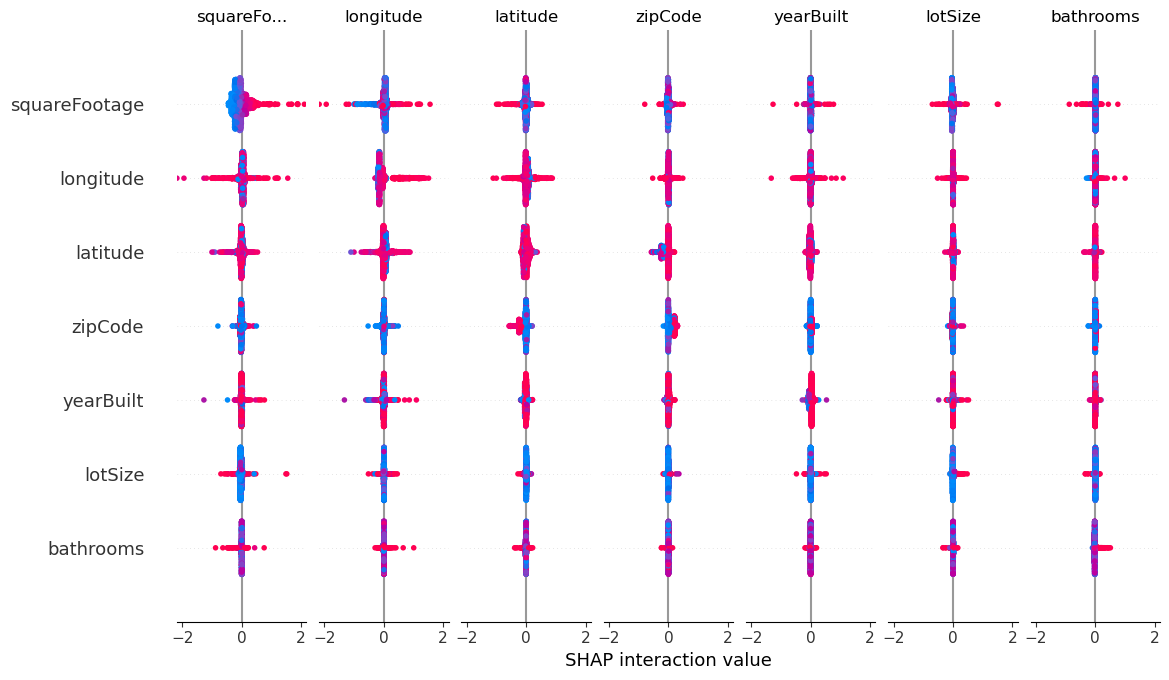

In [414]:
shap.summary_plot(shap_interaction_values, X_test)


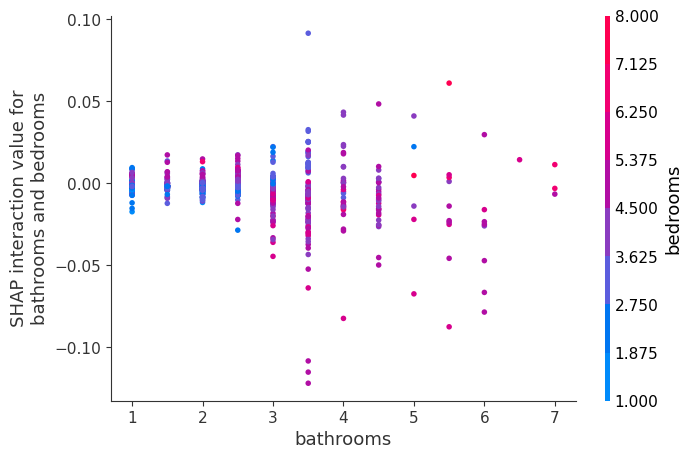

In [415]:
# Example: Interaction between 'bathrooms' and 'bedrooms'
shap.dependence_plot(('bathrooms', 'bedrooms'), shap_interaction_values, X_test)



In [416]:
# Install shapiq package
%pip install shapiq

from shapiq import Explainer

__all__ = ["Explainer", "TreeExplainer"]

Note: you may need to restart the kernel to use updated packages.


In [417]:
# Get interaction value for specific feature pairs
feature_1 = 'bathrooms'
feature_2 = 'bedrooms'
interaction_matrix = shap_interaction_values  # For regression models
interaction_value = interaction_matrix[:, X_test.columns.get_loc(feature_1), X_test.columns.get_loc(feature_2)].mean()
print(f"Interaction value between {feature_1} and {feature_2}: {interaction_value}")


Interaction value between bathrooms and bedrooms: -0.0011318606557324529


In [418]:
# Create Shapley interaction values for the XGBRegressor model.
%pip install shapiq

from shapiq import Explainer

explainer = Explainer(model=model2, data=X_train.values, max_order=2)

# explainer = shap.Explainer(model2, X_train, max_order=2)
shap_interaction_values = explainer.explain(X_train.iloc[0])


Note: you may need to restart the kernel to use updated packages.


c:\Users\kerim\anaconda3\envs\dev\lib\site-packages\shapiq\explainer\utils.py:119: UserWarning: No class_index provided. Explaining the 2nd '1' class for classification models. Please provide the class_index to explain a different class. Disregard this warning for regression models.
  warnings.warn(WARNING_NO_CLASS_INDEX)
c:\Users\kerim\anaconda3\envs\dev\lib\site-packages\shapiq\explainer\tree\treeshapiq.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_relevant = x[self._relevant_features]
c:\Users\kerim\anaconda3\envs\dev\lib\site-packages\shapiq\explainer\tree\treeshapiq.py:244: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

In [419]:
# Create Shapley interaction values for the XGBRegressor model.
%pip install shapiq

from shapiq import Explainer

explainer = shap.Explainer(model2, X_train, max_order=2)
shap_interaction_values = explainer.shap_interaction_values(X_train)
shap_interaction_values = explainer.explain(X[0], budget=0.95)

Note: you may need to restart the kernel to use updated packages.


TypeError: TreeExplainer.__init__() got an unexpected keyword argument 'max_order'

In [ ]:
# Create Shapley interaction values for the XGBRegressor model.
%pip install shapiq

from shapiq import Explainer

explainer = shap.Explainer(model = model2, X = X_train, max_order=2)
shap_interaction_values = explainer.shap_interaction_values(X_train)
shap_interaction_values = explainer.explain(X[0], budget=0.95)

Note: you may need to restart the kernel to use updated packages.


TypeError: TreeExplainer.__init__() got an unexpected keyword argument 'X'

In [ ]:
# Create Shapley values for the linear regression model.
explainer = shap.Explainer(model1, X_train)
shap_values1 = explainer(X_train.iloc[0:1])
shap.plots.force(shap_values1)

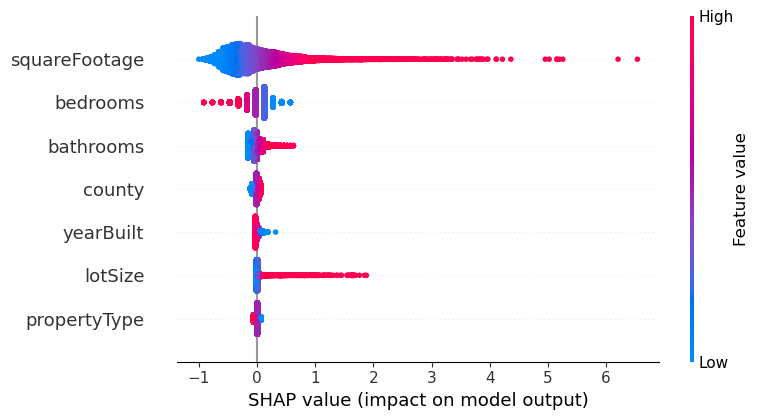

In [ ]:
# Calculate SHAP values for all observations in X_train
shap_values = explainer(X_train)

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_train)


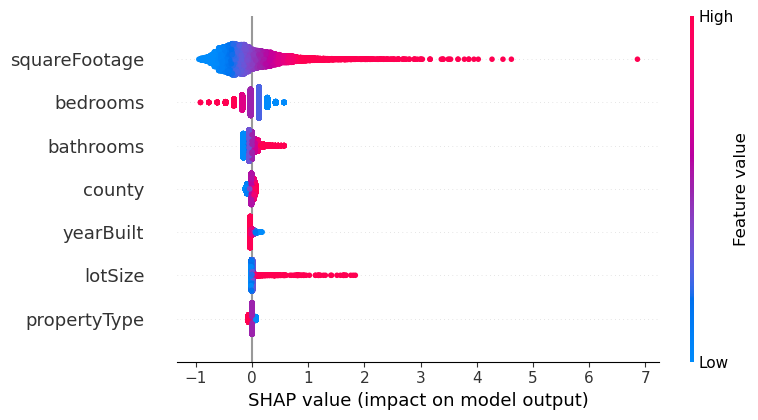

In [ ]:
# Calculate SHAP values for all observations in X_test
shap_values = explainer(X_test)

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_test)


Columns in X_test: Index(['zipCode', 'latitude', 'longitude', 'propertyType', 'bedrooms',
       'bathrooms', 'squareFootage', 'lotSize', 'yearBuilt', 'daysOnMarket'],
      dtype='object')


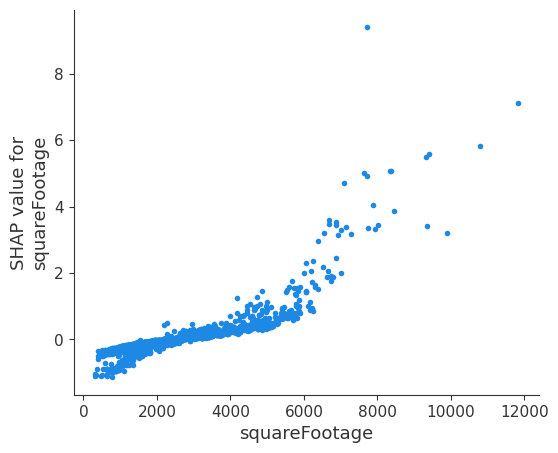

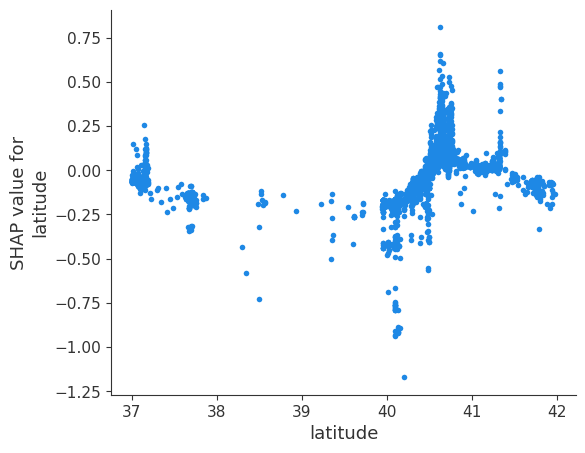

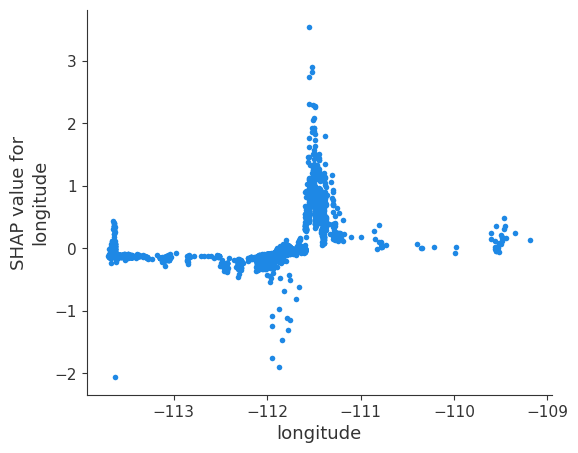

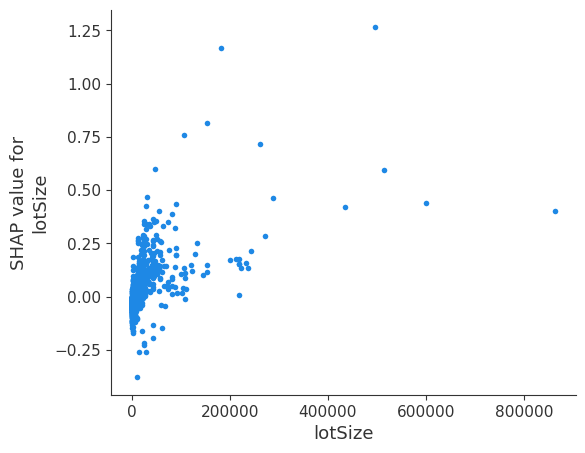

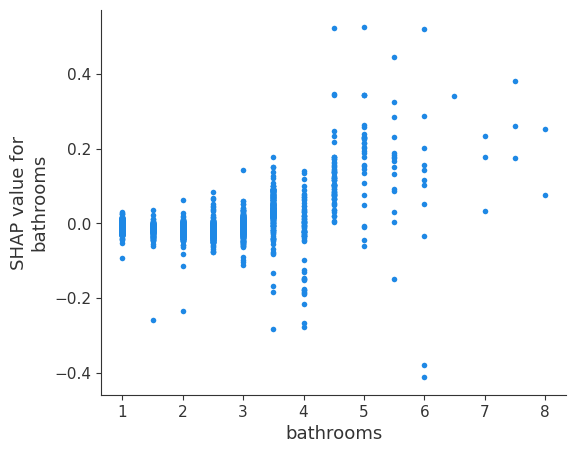

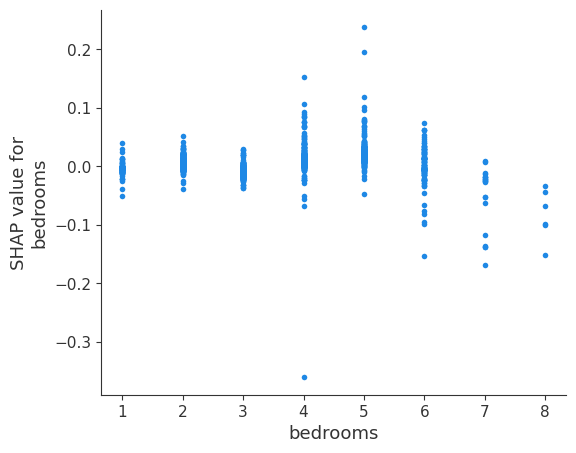

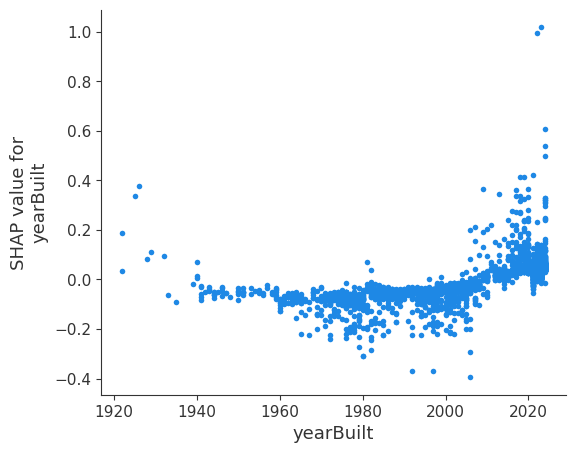

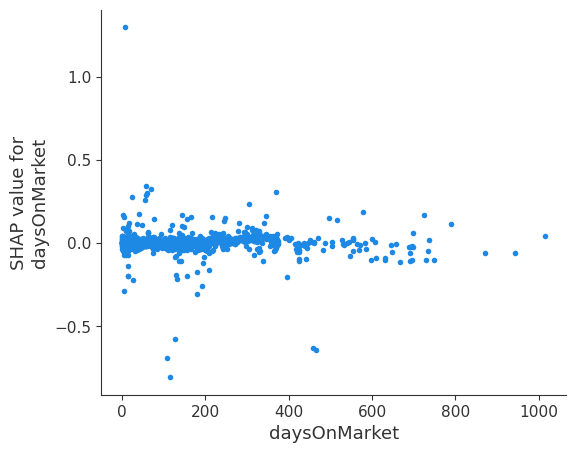

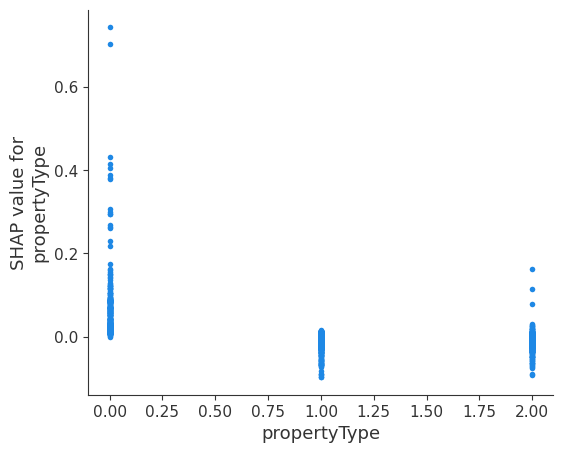

In [ ]:
# Print the column names of X_test to verify the correct feature names
print("Columns in X_test:", X_test.columns)

# Create a SHAP dependence plot to show the effect of a single feature across the whole dataset.
shap.dependence_plot('squareFootage', shap_values, X_test, interaction_index=None)
shap.dependence_plot('latitude', shap_values, X_test, interaction_index=None)
shap.dependence_plot('longitude', shap_values, X_test, interaction_index=None)
shap.dependence_plot('lotSize', shap_values, X_test, interaction_index=None)
shap.dependence_plot('bathrooms', shap_values, X_test, interaction_index=None)
shap.dependence_plot('bedrooms', shap_values, X_test, interaction_index=None)
shap.dependence_plot('yearBuilt', shap_values, X_test, interaction_index=None)
shap.dependence_plot('daysOnMarket', shap_values, X_test, interaction_index=None)
shap.dependence_plot('propertyType', shap_values, X_test, interaction_index=None)


In [ ]:
# Provide code to create the adjusted r-squared function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)

In [ ]:
# Calculate the adjusted r-squared value of the model.
adj_r2_model1 = r2_adj(X_test, y_test, model1)
adj_r2_model2 = r2_adj(X_test, y_test, model2)


In [ ]:
# Print the adjusted r-squared value of the model.
print(f"Linear Regression Model Adjusted R-squared: {adj_r2_model1}")
print(f"XGBRegressor Model Adjusted R-squared: {adj_r2_model2}")


Linear Regression Model Adjusted R-squared: 0.3567493528251785
XGBRegressor Model Adjusted R-squared: 0.7806559238171243


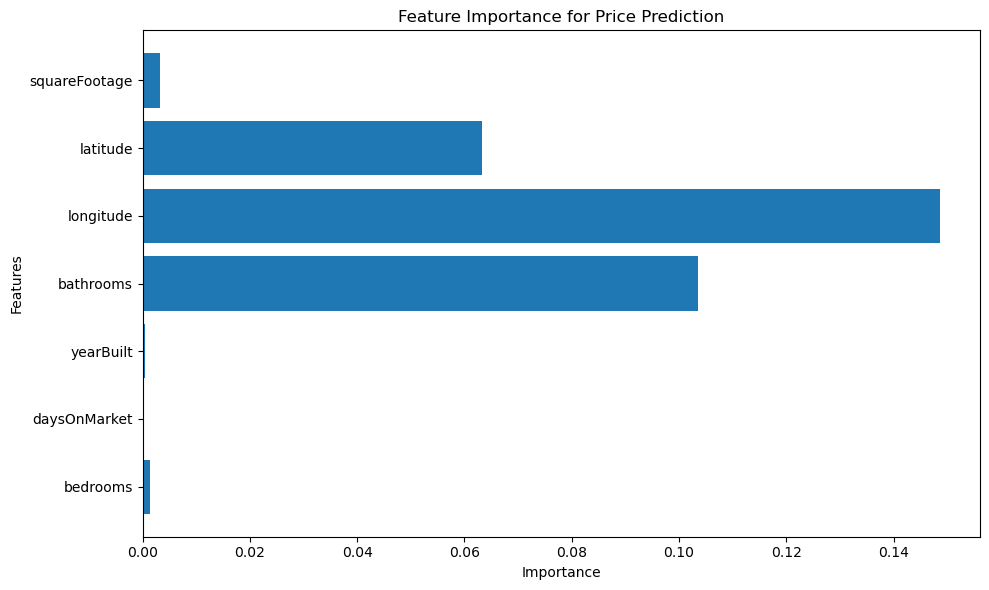

In [ ]:
# Create a visual representation. 
import matplotlib.pyplot as plt

# Data for visualization
features = ['squareFootage', 'latitude', 'longitude', 'bathrooms', 'yearBuilt', 'daysOnMarket', 'bedrooms']
importance = [abs(coef) for coef in model1.coef_]  # Use coefficients from model1 (Linear Regression model)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, importance, align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Price Prediction')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.tight_layout()
plt.show()

In [ ]:
# Examine linear regression on the better training data using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd

# Encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the train and test dataframes by the columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)

# Convert datetime strings in y_train and y_test to numerical values (e.g., timestamps)
y_train = pd.to_datetime(y_train).astype('int64') / 10**9  # Convert to seconds since epoch
y_test = pd.to_datetime(y_test).astype('int64') / 10**9  # Convert to seconds since epoch

# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the linear regression model
cross_val_scores = cross_val_score(model1, X_train_encoded, y_train, scoring='r2', cv=kf)

# Print the cross-validation scores
print("Cross Validation Scores:", cross_val_scores)

# Calculate the mean of the cross-validation scores
cross_val_mean = cross_val_scores.mean()

# Print the mean of the cross-validation scores
print("Mean Cross Validation Score:", cross_val_mean)

# Examine XGBRegressor on the better training data using cross validation
# Perform cross-validation on the XGBRegressor model
cross_val_scores2 = cross_val_score(model2, X_train_encoded, y_train, scoring='r2', cv=kf)

# Print the cross-validation scores
print("Cross Validation Scores:", cross_val_scores2)

# Calculate the mean of the cross-validation scores
cross_val_mean2 = cross_val_scores2.mean()

# Print the mean of the cross-validation scores
print("Mean Cross Validation Score:", cross_val_mean2)

# Print the adjusted r-squared value of the model.
print(f"Adjusted R-squared value for Linear Regression Model: {adj_r2_model1}")
print(f"Adjusted R-squared value for XGBRegressor Model: {adj_r2_model2}")

# Save the model to disk
import joblib
joblib.dump(model1, 'model1.joblib')
joblib.dump(model2, 'model2.joblib')
joblib.dump(X_train_encoded, 'X_train.joblib')
joblib.dump(y_train, 'y_train.joblib')
joblib.dump(X_test_encoded, 'X_test.joblib')
joblib.dump(y_test, 'y_test.joblib')
joblib.dump(cross_val_mean, 'cross_val_mean.joblib')
joblib.dump(cross_val_mean2, 'cross_val_mean2.joblib')
joblib.dump(adj_r2_model1, 'adj_r2_model1.joblib')
joblib.dump(adj_r2_model2, 'adj_r2_model2.joblib')

# Load the model from disk
loaded_model1 = joblib.load('model1.joblib')
loaded_model2 = joblib.load('model2.joblib')
loaded_X_train = joblib.load('X_train.joblib')
loaded_y_train = joblib.load('y_train.joblib')
loaded_X_test = joblib.load('X_test.joblib')
loaded_y_test = joblib.load('y_test.joblib')
loaded_cross_val_mean = joblib.load('cross_val_mean.joblib')
loaded_cross_val_mean2 = joblib.load('cross_val_mean2.joblib')
loaded_adj_r2_model1 = joblib.load('adj_r2_model1.joblib')
loaded_adj_r2_model2 = joblib.load('adj_r2_model2.joblib')

# Print the loaded model
print(loaded_model1)
print(loaded_model2)
print(loaded_X_train)
print(loaded_y_train)
print(loaded_X_test)
print(loaded_y_test)
print(loaded_cross_val_mean)
print(loaded_cross_val_mean2)
print(loaded_adj_r2_model1)
print(loaded_adj_r2_model2)

# Print the loaded model score
print(loaded_model1.score(loaded_X_test, loaded_y_test))
print(loaded_model2.score(loaded_X_test, loaded_y_test))
print(loaded_cross_val_mean)
print(loaded_cross_val_mean2)
print(loaded_adj_r2_model1)
print(loaded_adj_r2_model2)

# Print the loaded model predictions
print(loaded_model1.predict(loaded_X_test))
print(loaded_model2.predict(loaded_X_test))


Cross Validation Scores: [0.31799311 0.30714909 0.31102782 0.31465122 0.26130385]
Mean Cross Validation Score: 0.30242501644490216
Cross Validation Scores: [-6.18332913e-05 -1.48341337e-04 -5.96352983e-05 -2.51262606e-07
 -3.18792793e-07]
Mean Cross Validation Score: -5.407599640232519e-05
Adjusted R-squared value for Linear Regression Model: 0.3567493528251785
Adjusted R-squared value for XGBRegressor Model: 0.7806559238171243
LinearRegression()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
     